In [1]:
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
from matplotlib import interactive
interactive(True)

In [2]:
data = pd.read_csv('treecorder_data.csv')

def time_strings(data):
    return [d + ' '+ t for d, t in zip(data['Date'], data['Time'])]

data

,Date,Time,Moisture,Temperature,Humidity,X,Y,Z,R,G,B
0,11/14/2019,13:16:03,283,124.99,99.99,2.00,0.25,1.01,NaN,NaN,NaN
1,11/14/2019,13:16:14,129,124.99,99.99,2.00,0.24,1.00,NaN,NaN,NaN
2,11/14/2019,13:16:25,128,124.99,99.99,2.00,0.23,1.00,NaN,NaN,NaN
3,11/14/2019,13:16:35,278,124.99,99.99,2.00,0.24,1.01,NaN,NaN,NaN
4,11/14/2019,13:16:46,120,124.99,99.99,2.00,0.23,1.06,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
417,11/20/2019,13:00:49,322,8.34,52.64,0.33,-0.19,0.91,NaN,NaN,NaN
418,11/20/2019,13:01:00,314,8.35,52.48,0.34,-0.20,0.91,NaN,NaN,NaN
419,11/20/2019,13:01:12,287,8.35,52.44,0.34,-0.20,0.90,NaN,NaN,NaN
420,11/20/2019,13:01:23,367,8.36,52.28,0.34,-0.19,0.91,NaN,NaN,NaN


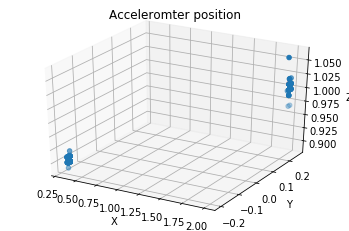

In [4]:
# %matplotlib qt
%matplotlib inline 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data['X'], data['Y'], data['Z'])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set(title='Acceleromter position')
plt.show()

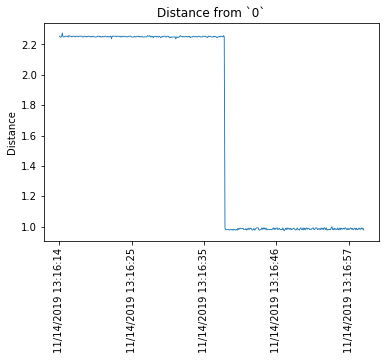

In [5]:
# Plot Accelerometer distance
%matplotlib inline 

fig = plt.figure()
ax = fig.add_subplot(111)
x, y, z = data['X'], data['Y'], data['Z']
dist = np.sqrt(x**2 + y**2 + z**2);
ax.set(title='Distance from `0`', ylabel='Distance')
ax.set_xticklabels([d + ' '+ t for d, t in zip(data['Date'], data['Time'])], rotation=90)
ax.plot(dist, linewidth=0.9)


range 89 1023
(422, 4)


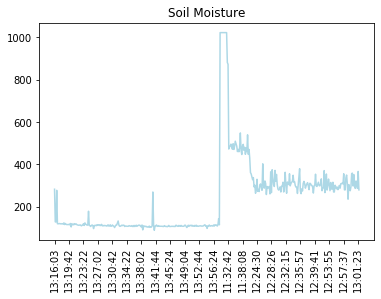

In [13]:
# Plot Moisture
%matplotlib inline 

m_fig = plt.figure()
m_ax = m_fig.add_subplot(111)

moisture = data['Moisture']

print('range', moisture.min(), moisture.max())

print(np.shape(moisture_color))
m_ax.set(title="Soil Moisture")
plt.xticks(range(len(data))[::20], data['Time'][::20], rotation=90)
m_ax.plot(moisture, color='lightblue')

In [7]:
## Define rainfall color map
from matplotlib.colors import ListedColormap

N = 256
c1 = np.array((151, 201, 199)) / N
c2 = np.array((23, 38, 147)) / N
vals = np.ones((N, 4))
vals[:, 0] = np.linspace(c1[0], c2[0], N)
vals[:, 1] = np.linspace(c1[1], c2[1], N)
vals[:, 2] = np.linspace(c1[2], c2[2], N)
rainfall = ListedColormap(vals)

In [8]:
# Datetime conversion utils
from datetime import datetime
print(time_strings(data)[0])
def time(string):
    return datetime.strptime(string, '%m/%d/%Y %H:%M:%S')
times = [time(s) for s in time_strings(data)]
print(times[0])

11/14/2019 13:16:03
2019-11-14 13:16:03


(422, 11)


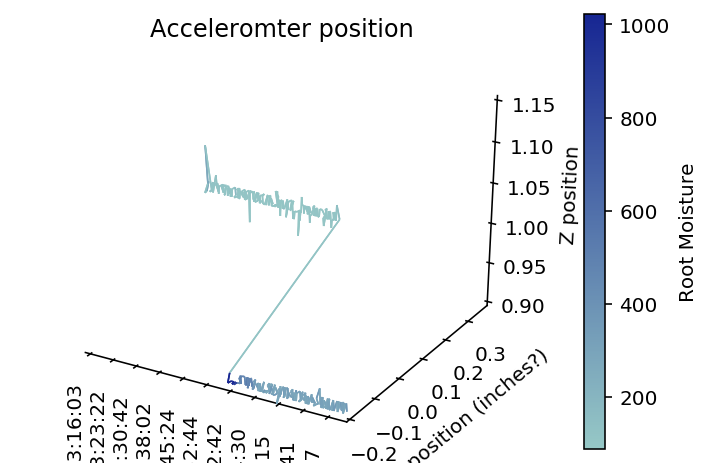

In [10]:
# https://stackoverflow.com/questions/38079366/matplotlib-line3dcollection-multicolored-line-edges-are-jagged
# https://matplotlib.org/gallery/lines_bars_and_markers/multicolored_line.html#sphx-glr-gallery-lines-bars-and-markers-multicolored-line-py
from mpl_toolkits.mplot3d.art3d import Line3DCollection

# Toggle between these two lines for interactivity or inline plotting
%matplotlib qt 
# %matplotlib inline 

fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='3d')

data = pd.read_csv('treecorder_data.csv')
# data = data.iloc[:229]
print(np.shape(data))

x_plus_t = data['X'] + np.multiply(range(len(data)), 10)

x, y, z = x_plus_t, data['Y'], data['Z']
points = np.array([x, y, z]).T.reshape(-1, 1, 3)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Create a norm to map from data points to colors
moisture = data['Moisture']
norm = plt.Normalize(moisture.min(), moisture.max())
lc = Line3DCollection(segments, cmap=rainfall, norm=norm)
# Set the values used for colormapping
lc.set_array(moisture)
lc.set_linewidth(0.8)
line = ax2.add_collection3d(lc)

ax2.set_xlim(min(x), max(x))
# ax2.set_ylim(0.125, 0.375)
ax2.set_ylim(min(y), 0.375)
ax2.set_zlim(0.9, 1.15)
ax2.add_collection3d(lc)
colorbar = fig2.colorbar(lc, ax=ax2)
colorbar.set_label('Root Moisture')

# ax2.set_xlabel('Time + X')
ax2.xaxis._axinfo['label']['space_factor'] = 10
ax2.set_ylabel('Y position (inches?)')
ax2.set_zlabel('Z position')

# Remove gridlines and pane backgrounds
ax2.grid(False)
ax2.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax2.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax2.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

# Set x labels every 20th sample
plt.xticks(x_plus_t[::40], time_strings(data)[::40], rotation=90)

ax2.set(title='Acceleromter position')
plt.show()

In [71]:
np.shape(x_plus_t), np.shape(time_strings(data))

((229,), (229,))